In [17]:
import json

data = {
    "主題": "癌症和地區、性別的關係",
    "地區資料": {
        "Northern Taiwan": {
            "台北市": {"男生": 519.73, "女生": 533.8},
            "新北市": {"男生": 521.47, "女生": 501.27},
            "基隆市": {"男生": 575.82, "女生": 499.73},
            "桃園市": {"男生": 434.08, "女生": 397.64},
            "新竹市": {"男生": 431.58, "女生": 443.15},
            "新竹縣": {"男生": 393.53, "女生": 400.24},
            "宜蘭縣": {"男生": 603.56, "女生": 470.26}
        },
        "Central Taiwan": {
            "苗栗縣": {"男生": 519.41, "女生": 483.22},
            "台中市": {"男生": 512.85, "女生": 484.93},
            "彰化縣": {"男生": 594.96, "女生": 489.6},
            "南投縣": {"男生": 618.12, "女生": 475.53},
            "雲林縣": {"男生": 652.79, "女生": 481.82}
        },
        "Southern Taiwan": {
            "嘉義市": {"男生": 603.87, "女生": 534.76},
            "嘉義縣": {"男生": 744.15, "女生": 509.57},
            "台南市": {"男生": 626.75, "女生": 547.33},
            "高雄市": {"男生": 618.76, "女生": 532.98},
            "屏東縣": {"男生": 664.11, "女生": 501.94},
            "澎湖縣": {"男生": 493.34, "女生": 372.01}
        },
        "Eastern Taiwan": {
            "花蓮縣": {"男生": 594.21, "女生": 496.99},
            "台東縣": {"男生": 623.04, "女生": 491.71}
        },
        "Outlying Islands": {
            "金門縣": {"男生": 287.84, "女生": 170.39},
            "連江縣": {"男生": 214.92, "女生": 261.55}
        }
    }
}
# 將 JSON 資料寫入檔案
with open('cancer_data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)


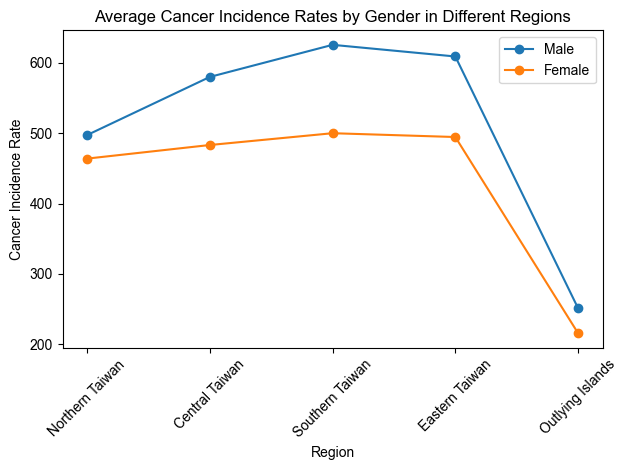

In [18]:
import json
import matplotlib.pyplot as plt

# Read JSON file
with open('cancer_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Prepare data for plotting
regions = ['Northern Taiwan', 'Central Taiwan', 'Southern Taiwan', 'Eastern Taiwan', 'Outlying Islands']
male_data = []
female_data = []

for region in regions:
    male_data.append(sum(data['地區資料'][region][area]['男生'] for area in data['地區資料'][region]) / len(data['地區資料'][region]))
    female_data.append(sum(data['地區資料'][region][area]['女生'] for area in data['地區資料'][region]) / len(data['地區資料'][region]))

# Plot the line chart
plt.plot(regions, male_data, marker='o', label='Male')
plt.plot(regions, female_data, marker='o', label='Female')

# Add title and labels to the chart
plt.title('Average Cancer Incidence Rates by Gender in Different Regions')
plt.xlabel('Region')
plt.ylabel('Cancer Incidence Rate')

# Add legend
plt.legend()

# Display the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
import json

# 讀取 JSON 檔案
with open('cancer_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 一：找出男生女生發病率最高的前五個縣市
male_rates = {}
female_rates = {}

for region in data['地區資料']:
    for city in data['地區資料'][region]:
        male_rates[city] = data['地區資料'][region][city]['男生']
        female_rates[city] = data['地區資料'][region][city]['女生']

top_5_male_cities = sorted(male_rates, key=male_rates.get, reverse=True)[:5]
top_5_female_cities = sorted(female_rates, key=female_rates.get, reverse=True)[:5]
print("問題一：")
print("男生發病率最高的前五個縣市：", top_5_male_cities)
print("女生發病率最高的前五個縣市：", top_5_female_cities)

# 二：找出男性和女性癌症發病率相差最大的縣市
max_difference_city = max(male_rates, key=lambda x: abs(male_rates[x] - female_rates[x]))
max_difference = abs(male_rates[max_difference_city] - female_rates[max_difference_city])
print()
print("問題二：")
print("男性和女性癌症發病率相差最大的縣市：", max_difference_city)
print("男女癌症發病率相差最大的值：", max_difference)

# 三：把地區的得病率由小到大排列
regions_rates = {
    'Northern Taiwan': [],
    'Central Taiwan': [],
    'Southern Taiwan': [],
    'Eastern Taiwan': [],
    'Outlying Islands': []
}

for region in data['地區資料']:
    for city in data['地區資料'][region]:
        regions_rates[region].append((city, data['地區資料'][region][city]['男生'], data['地區資料'][region][city]['女生']))

for region, city_data in regions_rates.items():
    city_data.sort(key=lambda x: x[1])  # 以男性發病率排序
    regions_rates[region] = city_data
print()
print("問題三：")
print("各地區的得病率由小到大排列：")
for region, city_data in regions_rates.items():
    print(region)
    for city in city_data:
        print(f"  {city[0]}: 男生 {city[1]}, 女生 {city[2]}")


問題一：
男生發病率最高的前五個縣市： ['嘉義縣', '屏東縣', '雲林縣', '台南市', '台東縣']
女生發病率最高的前五個縣市： ['台南市', '嘉義市', '台北市', '高雄市', '嘉義縣']

問題二：
男性和女性癌症發病率相差最大的縣市： 嘉義縣
男女癌症發病率相差最大的值： 234.57999999999998

問題三：
各地區的得病率由小到大排列：
Northern Taiwan
  新竹縣: 男生 393.53, 女生 400.24
  新竹市: 男生 431.58, 女生 443.15
  桃園市: 男生 434.08, 女生 397.64
  台北市: 男生 519.73, 女生 533.8
  新北市: 男生 521.47, 女生 501.27
  基隆市: 男生 575.82, 女生 499.73
  宜蘭縣: 男生 603.56, 女生 470.26
Central Taiwan
  台中市: 男生 512.85, 女生 484.93
  苗栗縣: 男生 519.41, 女生 483.22
  彰化縣: 男生 594.96, 女生 489.6
  南投縣: 男生 618.12, 女生 475.53
  雲林縣: 男生 652.79, 女生 481.82
Southern Taiwan
  澎湖縣: 男生 493.34, 女生 372.01
  嘉義市: 男生 603.87, 女生 534.76
  高雄市: 男生 618.76, 女生 532.98
  台南市: 男生 626.75, 女生 547.33
  屏東縣: 男生 664.11, 女生 501.94
  嘉義縣: 男生 744.15, 女生 509.57
Eastern Taiwan
  花蓮縣: 男生 594.21, 女生 496.99
  台東縣: 男生 623.04, 女生 491.71
Outlying Islands
  連江縣: 男生 214.92, 女生 261.55
  金門縣: 男生 287.84, 女生 170.39
